In [3]:
pip install mysql-connector-python pandas matplotlib scikit-learn python-pptx

Note: you may need to restart the kernel to use updated packages.


In [7]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Connect to MySQL
conn = mysql.connector.connect(
    host='localhost',
    user='root',          # Change this if needed
    password='Sahithi@3226',  # <-- Replace with your MySQL password
    database='MovieRatings2025'
)

# Function to run queries and return DataFrame
def run_query(query):
    return pd.read_sql(query, conn)

# 1️⃣ Top-rated movies per language
query_top = """
SELECT m.language, m.title, ROUND(AVG(r.rating), 2) AS avg_rating
FROM Movies m
JOIN Ratings r ON m.movie_id = r.movie_id
GROUP BY m.language, m.title
ORDER BY m.language, avg_rating DESC;
"""
df_top = run_query(query_top)
print("Top Rated Movies per Language:")
print(df_top)

# 2️⃣ Users who rated the most movies
query_users = """
SELECT u.name, COUNT(r.movie_id) AS total_movies_rated
FROM Users u
JOIN Ratings r ON u.user_id = r.user_id
GROUP BY u.name
ORDER BY total_movies_rated DESC;
"""
df_users = run_query(query_users)
print("\nUsers Who Rated the Most Movies:")
print(df_users)

# 3️⃣ Average rating per release year
query_year = """
SELECT m.release_year, ROUND(AVG(r.rating), 2) AS avg_rating
FROM Movies m
JOIN Ratings r ON m.movie_id = r.movie_id
GROUP BY m.release_year
ORDER BY m.release_year;
"""
df_year = run_query(query_year)
print("\nAverage Ratings per Year:")
print(df_year)

# 4️⃣ Most popular genre per language
query_genre = """
SELECT m.language, m.genre, ROUND(AVG(r.rating), 2) AS avg_genre_rating
FROM Movies m
JOIN Ratings r ON m.movie_id = r.movie_id
GROUP BY m.language, m.genre
ORDER BY m.language, avg_genre_rating DESC;
"""
df_genre = run_query(query_genre)
print("\nMost Popular Genre per Language:")
print(df_genre)


Top Rated Movies per Language:
  language                 title  avg_rating
0  English          Inside Out 2        4.90
1  English        Dune: Part Two        4.75
2  English  Deadpool & Wolverine        4.60
3    Hindi             Homebound        4.50
4    Hindi           Jolly LLB 3        4.35
5    Hindi            Nishaanchi        4.10
6   Telugu      They Call Him OG        4.75
7   Telugu                 Mirai        4.55
8   Telugu         Little Hearts        4.25

Users Who Rated the Most Movies:
      name  total_movies_rated
0  Sahithi                   3
1    Bhagi                   3
2   Anjali                   3
3   Kalyan                   3
4     Siva                   3

Average Ratings per Year:
   release_year  avg_rating
0          2024        4.75
1          2025        4.45

Most Popular Genre per Language:
  language      genre  avg_genre_rating
0  English  Animation              4.90
1  English     Sci-Fi              4.75
2  English     Action             

C:\Users\91949\AppData\Local\Temp\ipykernel_19356\2260153653.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)
C:\Users\91949\AppData\Local\Temp\ipykernel_19356\2260153653.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)
C:\Users\91949\AppData\Local\Temp\ipykernel_19356\2260153653.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)
C:\Users\91949\AppData\Local\Temp\ipykernel_19356\2260153653.py:15: UserWarning: pandas onl

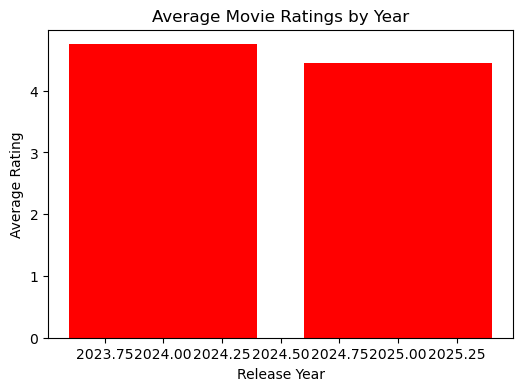

In [12]:
# Average Rating by Year

plt.figure(figsize=(6,4))
plt.bar(df_year['release_year'], df_year['avg_rating'], color='red')
plt.title('Average Movie Ratings by Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.show()

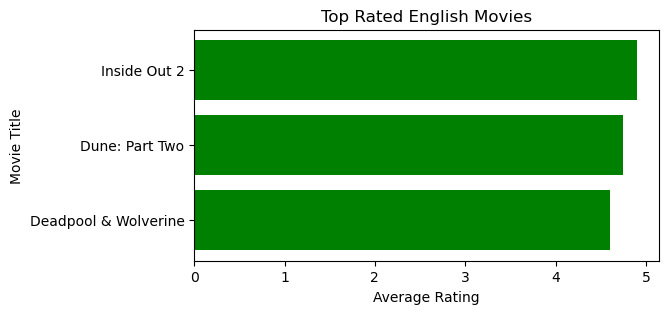

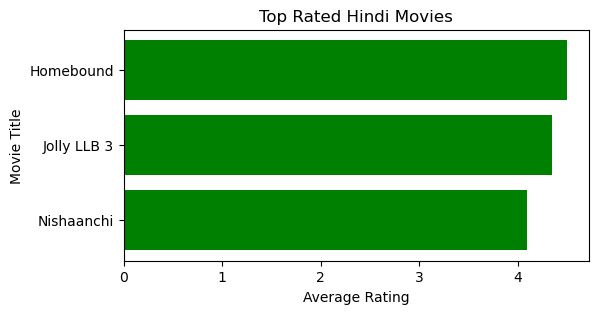

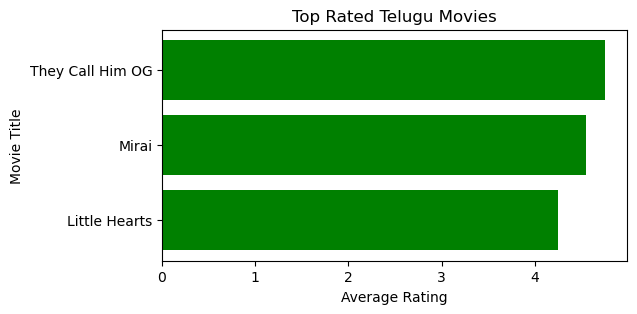

In [10]:
# Top Movies by Language

for lang in df_top['language'].unique():
    subset = df_top[df_top['language'] == lang]
    plt.figure(figsize=(6,3))
    plt.barh(subset['title'], subset['avg_rating'], color='green')
    plt.title(f'Top Rated {lang} Movies')
    plt.xlabel('Average Rating')
    plt.ylabel('Movie Title')
    plt.gca().invert_yaxis()
    plt.show()

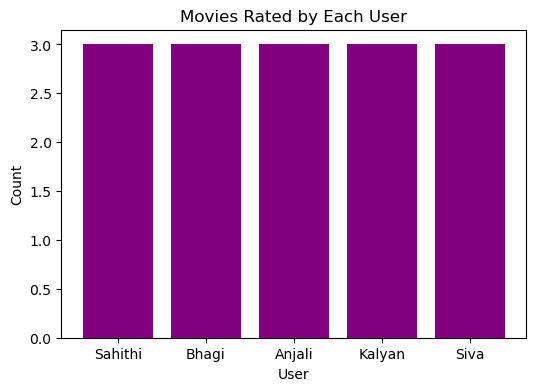

In [13]:
# User Activity

plt.figure(figsize=(6,4))
plt.bar(df_users['name'], df_users['total_movies_rated'], color='purple')
plt.title('Movies Rated by Each User')
plt.xlabel('User')
plt.ylabel('Count')
plt.show()


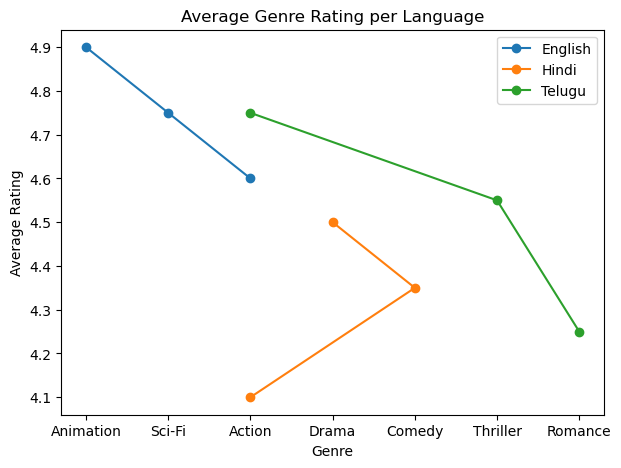

In [14]:
#  Genre Popularity per Language

plt.figure(figsize=(7,5))
for lang in df_genre['language'].unique():
    subset = df_genre[df_genre['language'] == lang]
    plt.plot(subset['genre'], subset['avg_genre_rating'], marker='o', label=lang)

plt.title('Average Genre Rating per Language')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.legend()
plt.show()